In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import plt
%%matplotlib.inline
import numpy as np

ImportError: cannot import name 'plt' from 'matplotlib.pyplot' (C:\Users\LEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\pyplot.py)

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [12]:
X_train[0].shape

(28, 28)

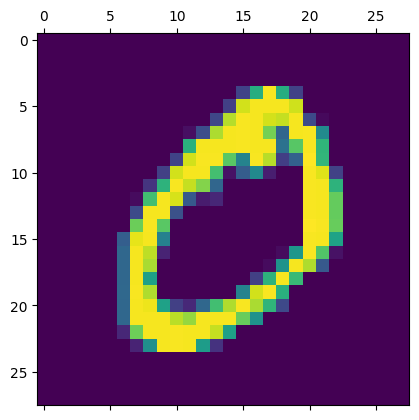

In [17]:
import matplotlib.pyplot as plt
plt.matshow(X_train[1])

In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
X_train.shape

(60000, 28, 28)

In [43]:
#scalling
X_train = X_train/255
X_test = X_test/255

In [44]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_train_flatten.shape

X_test_flatten = X_test.reshape(len(X_test),28*28)
X_test_flatten.shape

(10000, 784)

In [45]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)
#epochs is number of iteration

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.8066 - loss: 0.7270
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.9128 - loss: 0.3145
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.9180 - loss: 0.2897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.9259 - loss: 0.2722
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.9250 - loss: 0.2684


In [50]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9148 - loss: 0.3029


[0.2667781412601471, 0.9258999824523926]

In [54]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


array([2.1595061e-02, 4.4022406e-07, 4.2912096e-02, 9.3600178e-01,
       2.1009452e-03, 1.0383729e-01, 1.6378733e-06, 9.9974662e-01,
       9.1373764e-02, 7.5519687e-01], dtype=float32)

In [58]:
import numpy as np
np.argmax(y_predicted[1])

2

In [64]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [67]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,    9,  936,   16,   11,    2,   11,   10,   28,    4],
       [   3,    0,   22,  922,    2,   20,    1,    9,   16,   15],
       [   1,    1,    4,    1,  927,    0,    9,    3,    5,   31],
       [  10,    3,    5,   31,   14,  771,   18,    5,   26,    9],
       [  11,    3,    7,    1,    8,   12,  913,    2,    1,    0],
       [   2,    5,   23,    4,   10,    0,    0,  936,    2,   46],
       [   5,   11,    7,   24,   11,   29,    9,   10,  850,   18],
       [  11,    7,    1,    8,   31,    7,    0,   12,    4,  928]])>

Text(95.72222222222221, 0.5, 'Truth')

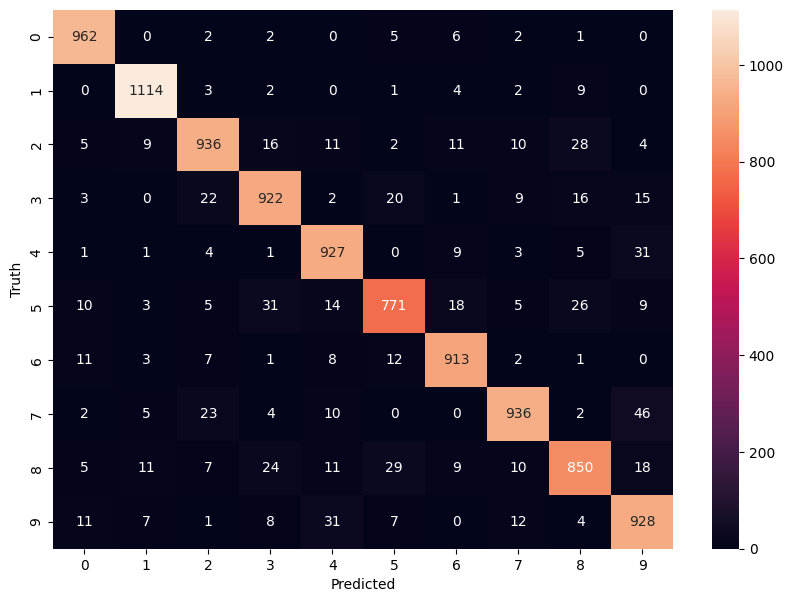

In [72]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flatten,y_train,epochs=5)
#epochs is number of iteration

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 782us/step - accuracy: 0.8776 - loss: 0.4456
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9644 - loss: 0.1241
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - accuracy: 0.9760 - loss: 0.0821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.9821 - loss: 0.0604
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.9851 - loss: 0.0475


Text(95.72222222222221, 0.5, 'Truth')

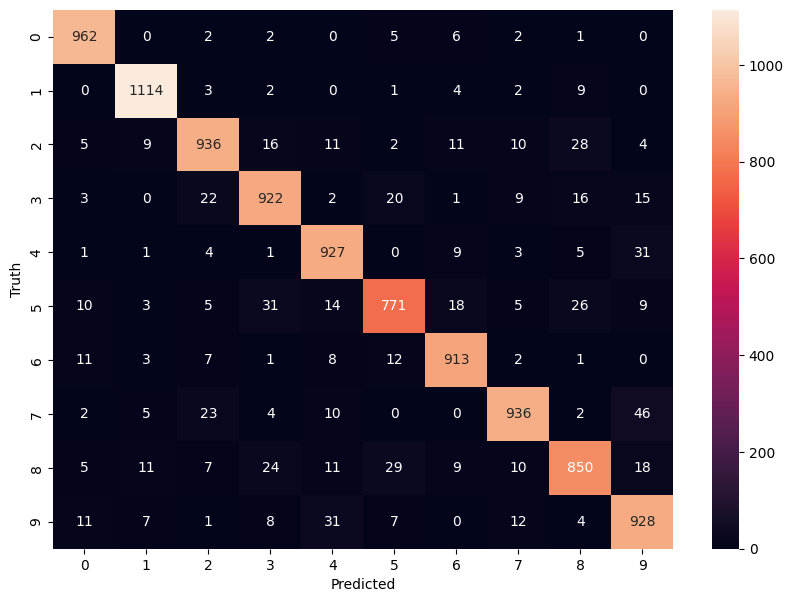

In [76]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])
#epochs is number of iteration

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7994 - loss: 6.5371
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9079 - loss: 0.3776
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9294 - loss: 0.2701
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9396 - loss: 0.2277
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9445 - loss: 0.2094


In [ ]:
!tensorboard --logdir logs/